In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [2]:
path = './input/'
filename1 = path + '10x50m_Top_D15_+ve.txt'
filename2 = path + '10x50m_Top_D15_-ve.txt'

In [3]:
f = open(filename2)
lines = f.read().splitlines()
f.close()
for i, line in enumerate(lines):
    if i < 10:
        print(i, line)

0 
1 ShotNo  StrNo  RecNo  Offset:m  MidPtX:m  MidPtY:m  DipSrc:°  DipRec:°  AzSrc:°  AzRec:°  Ttime:s  ReflPosX:m  ReflPosY:m  RefAngIn:°  RefAngOut:°  
2 1       1      241    158.34    5016.67   2000      7.80479   169.135   -89.9996 89.9997  1.85282  4558.24     2000        2.49332     2.49332      
3 1       1      242    158.832   5016.67   1993.75   7.80576   169.134   -89.0664 89.3274  1.85283  4558.24     1993.82     2.50147     2.50147      
4 1       1      243    160.301   5016.67   1987.5    7.81143   169.135   -88.1224 88.6464  1.85282  4558.11     1987.56     2.52212     2.52204      
5 1       1      244    162.72    5016.67   1981.25   7.81817   169.133   -87.188  87.9715  1.85285  4558.03     1981.36     2.55987     2.55987      
6 1       1      245    166.047   5016.67   1975      7.82517   169.128   -86.2764 87.313   1.85291  4558.03     1975.3      2.61389     2.61382      
7 1       1      246    170.229   5016.67   1968.75   7.83217   169.12    -85.3648 86.6552 

In [4]:
column_names = ['ShotNo', 'StrNo', 'RecNo', 'Offset', 'MidPtX', 'MidPtY', 'DipSrc', 'DipRec', 'AzSrc', 'AzRec', 'Ttime', 'ReflPosX', 'ReflPosY', 'RefAngIn', 'RefAngOut']

In [5]:
df1_raw = pd.DataFrame()
df2_raw = pd.DataFrame()

In [6]:
rowstoskip = 2

In [7]:
df1_raw = pd.read_csv(filename1, names=column_names, skiprows=rowstoskip, delim_whitespace=True)
df2_raw = pd.read_csv(filename2, names=column_names, skiprows=rowstoskip, delim_whitespace=True)

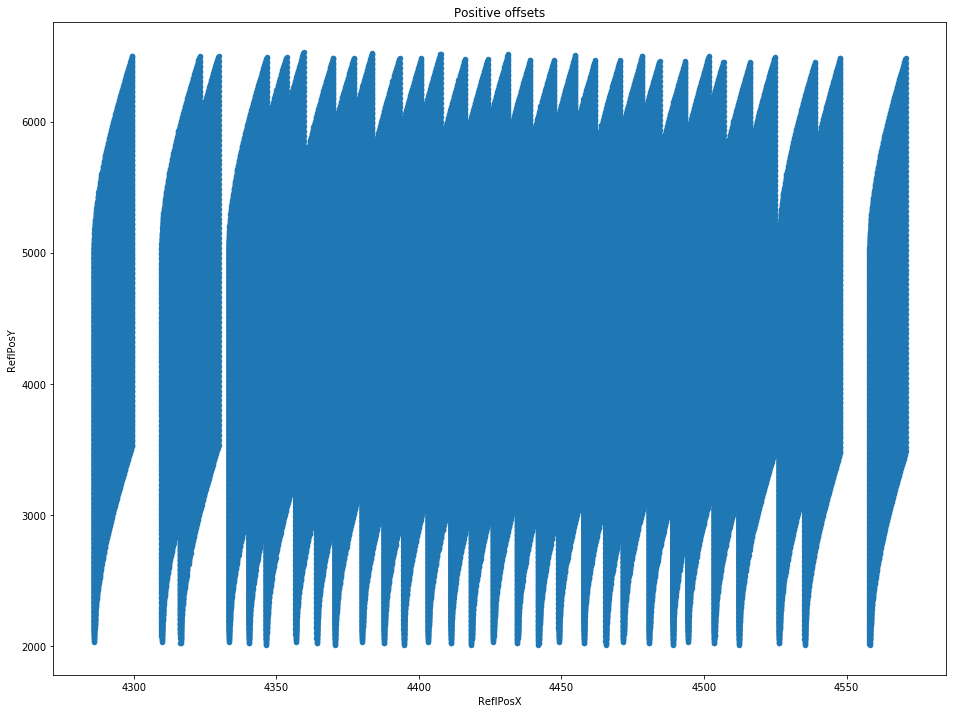

In [8]:
df1_raw.plot(x='ReflPosX', y='ReflPosY', figsize=(16, 12), kind='scatter')
plt.title('Positive offsets');

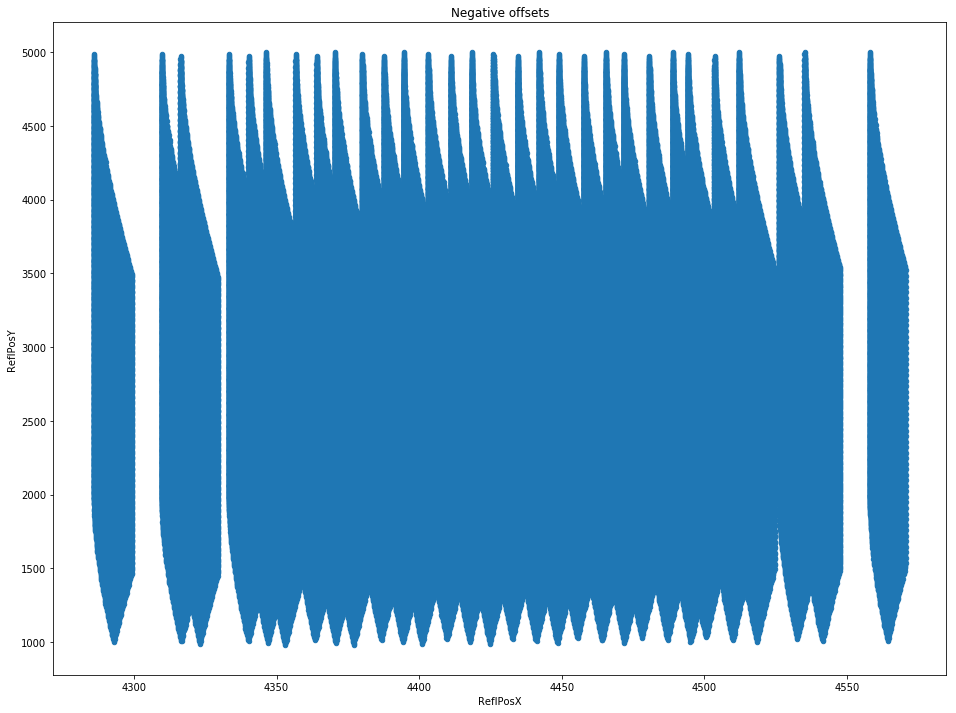

In [9]:
df2_raw.plot(x='ReflPosX', y='ReflPosY', figsize=(16, 12), kind='scatter')
plt.title('Negative offsets');

In [10]:
#df1_raw.plot(x='ShotNo', y='RefAngIn', figsize=(16, 12), kind='scatter');

In [11]:
#test = df1_raw.iloc[[1]]

In [12]:
#test['Offset']

## Setting the limits for Reciprocal traces:

In [36]:
#df1_raw

In [14]:
d_offset = 20
d_reflpoint_X = 20
d_reflpoint_Y = 60
d_midpoint_X = 20
d_midpoint_Y = 60
d_azm = 30

In [15]:
def is_resiproc(row1, row2):
    if ((abs(row1['Offset'].values-row2['Offset'].values) < d_offset) & 
        (abs(row1['ReflPosX'].values-row2['ReflPosX'].values) < d_reflpoint_X) & 
        (abs(row1['ReflPosY'].values-row2['ReflPosY'].values) < d_reflpoint_Y) & 
        (abs(-row1['AzSrc'].values-row2['AzRec'].values) < d_azm) & 
        (abs(-row1['AzRec'].values-row2['AzSrc'].values) < d_azm)):
        #print('Reciproc trace found!')
        return True
    else:
        return False

In [16]:
def is_resiproc_midpt(row1, row2):
    if ((abs(row1['Offset'].values-row2['Offset'].values) < d_offset) & 
        (abs(row1['MidPtX'].values-row2['MidPtX'].values) < d_midpoint_X) & 
        (abs(row1['MidPtY'].values-row2['MidPtY'].values) < d_midpoint_Y) & 
        (abs(-row1['AzSrc'].values-row2['AzRec'].values) < d_azm) & 
        (abs(-row1['AzRec'].values-row2['AzSrc'].values) < d_azm)):
        #print('Reciproc trace found!')
        return True
    else:
        return False

In [17]:
from datetime import datetime

In [18]:
print(len(df1_raw))

578400


## Subselecting only MidPtY = 3500 (full fold) to limit number of datarows in the for-loop:

In [19]:
df1_mpy_3500 = df1_raw[df1_raw['MidPtY']==3500].reset_index()
df2_mpy_3500 = df2_raw[df2_raw['MidPtY']==3500].reset_index()

In [20]:
print(len(df2_mpy_3500))

1200


## Making list of Reciproc Traces using for-loop (slow):

In [21]:
print(datetime.now())

2019-06-04 14:19:28.983326


In [22]:
reciproc_midpt_list = []
for i in range(len(df1_mpy_3500)):
    for j in range(len(df2_mpy_3500)):
        if(is_resiproc_midpt(df1_mpy_3500.iloc[[i]], df2_mpy_3500.iloc[[j]])):
            print('Reciprocal trace found at '+ str(i) + ' ' + str(j))
            reciproc_midpt_list.append((i, j))

Reciprocal trace found at 1082 20
Reciprocal trace found at 1082 50
Reciprocal trace found at 1083 20
Reciprocal trace found at 1083 50
Reciprocal trace found at 1091 50
Reciprocal trace found at 1092 20
Reciprocal trace found at 1092 50
Reciprocal trace found at 1093 51
Reciprocal trace found at 1096 68
Reciprocal trace found at 1097 9
Reciprocal trace found at 1097 39
Reciprocal trace found at 1097 68
Reciprocal trace found at 1098 69
Reciprocal trace found at 1105 8
Reciprocal trace found at 1105 38
Reciprocal trace found at 1105 67
Reciprocal trace found at 1106 8
Reciprocal trace found at 1106 38
Reciprocal trace found at 1106 78
Reciprocal trace found at 1107 49
Reciprocal trace found at 1107 78
Reciprocal trace found at 1108 79
Reciprocal trace found at 1110 90
Reciprocal trace found at 1111 40
Reciprocal trace found at 1111 91
Reciprocal trace found at 1112 10
Reciprocal trace found at 1112 40
Reciprocal trace found at 1112 71
Reciprocal trace found at 1112 92
Reciprocal trace 

In [23]:
reciproc_refpt_list = []
for i in range(len(df1_mpy_3500)):
    for j in range(len(df2_mpy_3500)):
        if(is_resiproc(df1_mpy_3500.iloc[[i]], df2_mpy_3500.iloc[[j]])):
            print('Reciprocal trace found at '+ str(i) + ' ' + str(j))
            reciproc_refpt_list.append((i, j))

Reciprocal trace found at 1082 20
Reciprocal trace found at 1082 50
Reciprocal trace found at 1083 20
Reciprocal trace found at 1083 50
Reciprocal trace found at 1091 50
Reciprocal trace found at 1092 20
Reciprocal trace found at 1092 50
Reciprocal trace found at 1093 51
Reciprocal trace found at 1096 68
Reciprocal trace found at 1097 9
Reciprocal trace found at 1097 39
Reciprocal trace found at 1097 68
Reciprocal trace found at 1098 69
Reciprocal trace found at 1105 8
Reciprocal trace found at 1105 38
Reciprocal trace found at 1105 67
Reciprocal trace found at 1106 8
Reciprocal trace found at 1106 38
Reciprocal trace found at 1106 78
Reciprocal trace found at 1107 49
Reciprocal trace found at 1107 78
Reciprocal trace found at 1108 79
Reciprocal trace found at 1110 90
Reciprocal trace found at 1111 40
Reciprocal trace found at 1111 91
Reciprocal trace found at 1112 10
Reciprocal trace found at 1112 40
Reciprocal trace found at 1112 71
Reciprocal trace found at 1112 92
Reciprocal trace 

In [24]:
print(datetime.now())

2019-06-04 15:02:12.094306


In [27]:
len(reciproc_refpt_list)
len(reciproc_midpt_list)

219

In [ ]:
#reciproc_midpt_list = reciproc_list

In [28]:
reciproc_refpt_list

[(1082, 20),
 (1082, 50),
 (1083, 20),
 (1083, 50),
 (1091, 50),
 (1092, 20),
 (1092, 50),
 (1093, 51),
 (1096, 68),
 (1097, 9),
 (1097, 39),
 (1097, 68),
 (1098, 69),
 (1105, 8),
 (1105, 38),
 (1105, 67),
 (1106, 8),
 (1106, 38),
 (1106, 78),
 (1107, 49),
 (1107, 78),
 (1108, 79),
 (1110, 90),
 (1111, 40),
 (1111, 91),
 (1112, 10),
 (1112, 40),
 (1112, 71),
 (1112, 92),
 (1113, 72),
 (1113, 93),
 (1114, 21),
 (1114, 52),
 (1114, 72),
 (1114, 94),
 (1115, 52),
 (1115, 95),
 (1116, 96),
 (1117, 97),
 (1120, 70),
 (1121, 71),
 (1122, 21),
 (1122, 93),
 (1122, 94),
 (1123, 22),
 (1123, 52),
 (1123, 94),
 (1124, 22),
 (1124, 53),
 (1124, 66),
 (1125, 7),
 (1125, 37),
 (1125, 53),
 (1125, 66),
 (1125, 84),
 (1126, 37),
 (1126, 84),
 (1126, 85),
 (1127, 8),
 (1127, 38),
 (1128, 78),
 (1129, 79),
 (1130, 80),
 (1131, 81),
 (1131, 102),
 (1132, 82),
 (1132, 95),
 (1132, 103),
 (1132, 104),
 (1133, 66),
 (1133, 83),
 (1133, 95),
 (1134, 7),
 (1134, 37),
 (1134, 66),
 (1134, 76),
 (1135, 7),
 (1

In [29]:
reciproc_midpt_list

[(1082, 20),
 (1082, 50),
 (1083, 20),
 (1083, 50),
 (1091, 50),
 (1092, 20),
 (1092, 50),
 (1093, 51),
 (1096, 68),
 (1097, 9),
 (1097, 39),
 (1097, 68),
 (1098, 69),
 (1105, 8),
 (1105, 38),
 (1105, 67),
 (1106, 8),
 (1106, 38),
 (1106, 78),
 (1107, 49),
 (1107, 78),
 (1108, 79),
 (1110, 90),
 (1111, 40),
 (1111, 91),
 (1112, 10),
 (1112, 40),
 (1112, 71),
 (1112, 92),
 (1113, 72),
 (1113, 93),
 (1114, 21),
 (1114, 52),
 (1114, 72),
 (1114, 94),
 (1115, 52),
 (1115, 95),
 (1116, 96),
 (1117, 97),
 (1120, 70),
 (1121, 71),
 (1122, 21),
 (1122, 93),
 (1122, 94),
 (1123, 22),
 (1123, 52),
 (1123, 94),
 (1124, 22),
 (1124, 53),
 (1124, 66),
 (1125, 7),
 (1125, 37),
 (1125, 53),
 (1125, 66),
 (1125, 84),
 (1126, 37),
 (1126, 84),
 (1126, 85),
 (1127, 8),
 (1127, 38),
 (1128, 78),
 (1129, 79),
 (1130, 80),
 (1131, 81),
 (1131, 102),
 (1132, 82),
 (1132, 95),
 (1132, 103),
 (1132, 104),
 (1133, 66),
 (1133, 83),
 (1133, 95),
 (1134, 7),
 (1134, 37),
 (1134, 66),
 (1134, 76),
 (1135, 7),
 (1

In [30]:
df1_mpy_3500['Reciproc'] = False
df2_mpy_3500['Reciproc'] = False

In [31]:
for k,l in reciproc_refpt_list:
    #print(k, l)
    df1_mpy_3500.iloc[k, -1] = True
    df2_mpy_3500.iloc[l, -1] = True

In [32]:
df1_mpy_3500

,index,ShotNo,StrNo,RecNo,Offset,MidPtX,MidPtY,DipSrc,DipRec,AzSrc,AzRec,Ttime,ReflPosX,ReflPosY,RefAngIn,RefAngOut,Reciproc
0,0,1,1,1,3004.1800,5016.67,3500.0,25.10830,154.155,-166.1160,160.8960,2.32360,4570.69,3483.92,41.129500,41.129500,False
1,240,1,2,1,3001.9600,4991.67,3500.0,25.26970,154.226,-165.3360,161.7610,2.31891,4547.87,3488.99,41.221100,41.221100,False
2,480,1,3,1,3000.5700,4966.67,3500.0,25.43430,154.294,-164.5620,162.6350,2.31445,4524.88,3494.11,41.321300,41.321300,False
3,720,1,4,1,3000.0100,4941.67,3500.0,25.60140,154.360,-163.7920,163.5180,2.31018,4501.71,3499.21,41.428600,41.428600,False
4,960,1,5,1,3000.2900,4916.67,3500.0,25.77120,154.422,-163.0290,164.4080,2.30612,4478.41,3504.32,41.544100,41.544100,False
5,1200,1,6,1,3001.4000,4891.67,3500.0,25.94380,154.483,-162.2650,165.3120,2.30220,4454.78,3509.39,41.666400,41.666400,False
6,1440,1,7,1,3003.3400,4866.67,3500.0,26.11860,154.537,-161.5230,166.2120,2.29872,4431.38,3514.67,41.800500,41.800500,False
7,1680,1,8,1,3006.1200,4841.67,3500.0,26.29620,154.589,-160.7800,167.1250,2.29536,4407.62,3519.91,41.941300,41.941300,False
8,1920,1,9,1,3009.7200,4816.67,3500.0,26.47620,154.637,-160.0440,168.0460,2.29224,4383.69,3525.18,42.090600,42.090600,False
9,2160,1,10,1,3014.1400,4791.67,3500.0,26.65870,154.682,-159.3130,168.9740,2.28934,4359.58,3530.50,42.248500,42.248500,False


In [33]:
df1_mpy_3500['Reciproc_midpt'] = False
df2_mpy_3500['Reciproc_midpt'] = False

In [34]:
for k,l in reciproc_midpt_list:
    #print(k, l)
    df1_mpy_3500.iloc[k, -1] = True
    df2_mpy_3500.iloc[l, -1] = True

In [35]:
df2_mpy_3500

,index,ShotNo,StrNo,RecNo,Offset,MidPtX,MidPtY,DipSrc,DipRec,AzSrc,AzRec,Ttime,ReflPosX,ReflPosY,RefAngIn,RefAngOut,Reciproc,Reciproc_midpt
0,256370,121,1,241,158.34000,5016.67,3500.0,7.80479,169.135,-89.9996,89.9997,1.85282,4558.24,3500.00,2.493320,2.493320,True,True
1,256610,121,2,241,108.34000,4991.67,3500.0,8.28659,169.611,-89.9994,89.9995,1.84659,4535.31,3500.00,1.712920,1.712810,False,False
2,256850,121,3,241,58.33980,4966.67,3500.0,8.77145,170.092,-89.9971,89.9974,1.84064,4512.22,3499.98,0.925984,0.925984,False,False
3,257090,121,4,241,8.33984,4941.67,3500.0,9.25906,170.578,-89.9928,89.9929,1.83496,4488.99,3499.94,0.132704,0.132704,False,False
4,257330,121,5,241,41.66020,4916.67,3500.0,9.74903,171.069,-90.0010,90.0011,1.82958,4465.63,3500.01,0.666172,0.666172,False,False
5,257570,121,6,241,91.66020,4891.67,3500.0,10.24160,171.564,-90.0008,90.0010,1.82447,4442.09,3500.01,1.471130,1.471130,True,True
6,257810,121,7,241,141.66000,4866.67,3500.0,10.73600,172.064,-89.9967,89.9956,1.81967,4418.43,3499.97,2.281300,2.281220,True,True
7,258050,121,8,241,191.66000,4841.67,3500.0,11.23250,172.569,-89.9987,89.9981,1.81515,4394.60,3499.99,3.097060,3.097060,True,True
8,258290,121,9,241,241.66000,4816.67,3500.0,11.73520,173.082,-89.9932,89.9884,1.81089,4370.40,3499.93,3.925510,3.925510,True,True
9,258530,121,10,241,291.66000,4791.67,3500.0,12.23400,173.593,-90.0059,90.0112,1.80698,4346.30,3500.06,4.750070,4.750070,True,True


In [37]:
df1_mpy_3500['Reciproc'].value_counts()

False    1106
True       94
Name: Reciproc, dtype: int64

In [38]:
df1_mpy_3500['Reciproc_midpt'].value_counts()

False    1106
True       94
Name: Reciproc_midpt, dtype: int64

## Plotting data

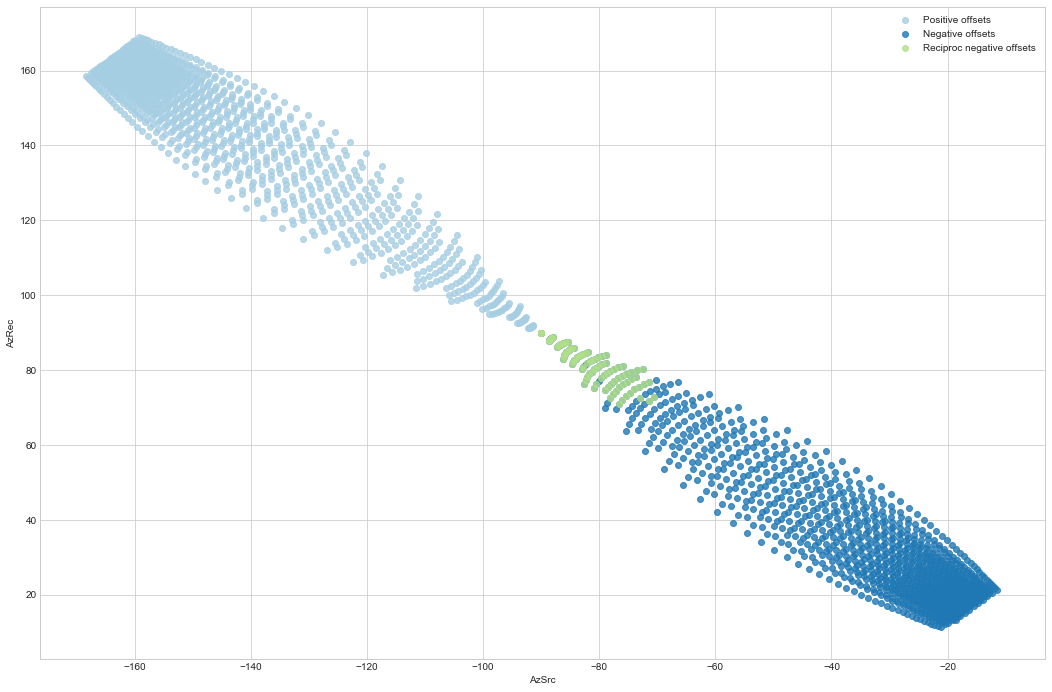

In [41]:
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt.figure(figsize=(18,12))
sns.regplot(x=df1_mpy_3500['AzSrc'], y=df1_mpy_3500["AzRec"], fit_reg=False, label='Positive offsets')
sns.regplot(x=df2_mpy_3500['AzSrc'], y=df2_mpy_3500["AzRec"], fit_reg=False, label='Negative offsets')
sns.regplot(x=df2_mpy_3500[df2_mpy_3500['Reciproc']]['AzSrc'], y=df2_mpy_3500[df2_mpy_3500['Reciproc']]["AzRec"], fit_reg=False, label='Reciproc negative offsets')
#sns.regplot(x=df2_mpy_3500[df2_mpy_3500['Reciproc_midpt']]['AzSrc'], y=df2_mpy_3500[df2_mpy_3500['Reciproc_midpt']]["AzRec"], fit_reg=False, label='Reciproc negative offsets')
plt.legend();

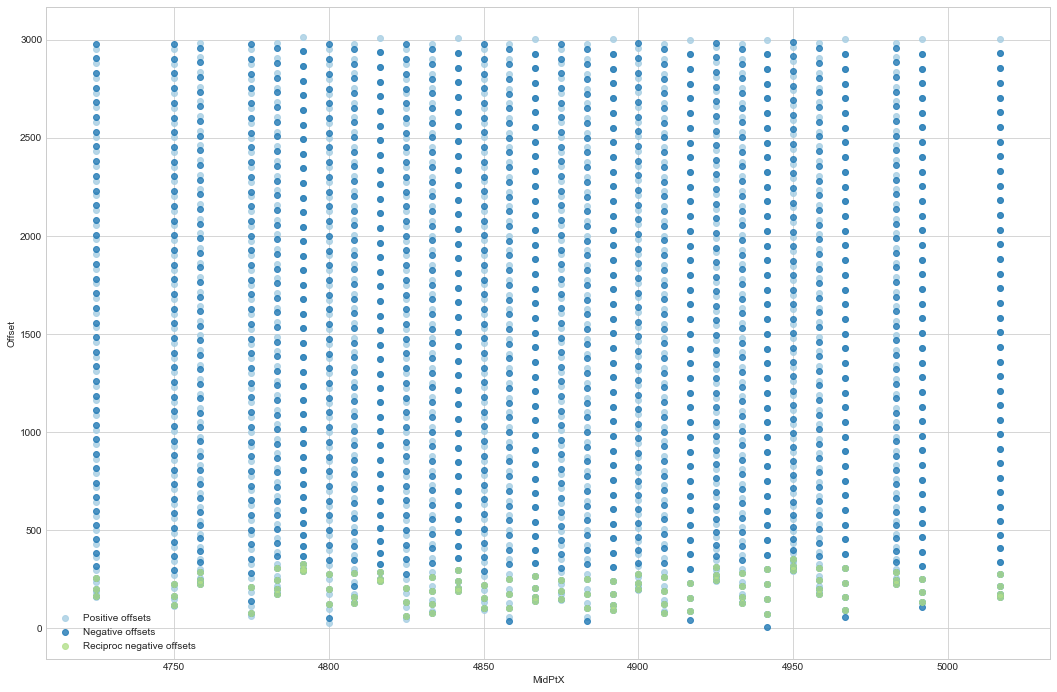

In [42]:
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt.figure(figsize=(18,12))
sns.regplot(x=df1_mpy_3500['MidPtX'], y=df1_mpy_3500["Offset"], fit_reg=False, label='Positive offsets')
sns.regplot(x=df2_mpy_3500['MidPtX'], y=df2_mpy_3500["Offset"], fit_reg=False, label='Negative offsets')
sns.regplot(x=df2_mpy_3500[df2_mpy_3500['Reciproc_midpt']]['MidPtX'], y=df2_mpy_3500[df2_mpy_3500['Reciproc']]["Offset"], fit_reg=False, label='Reciproc negative offsets');
#plt.ylim(0, 500)
plt.legend();

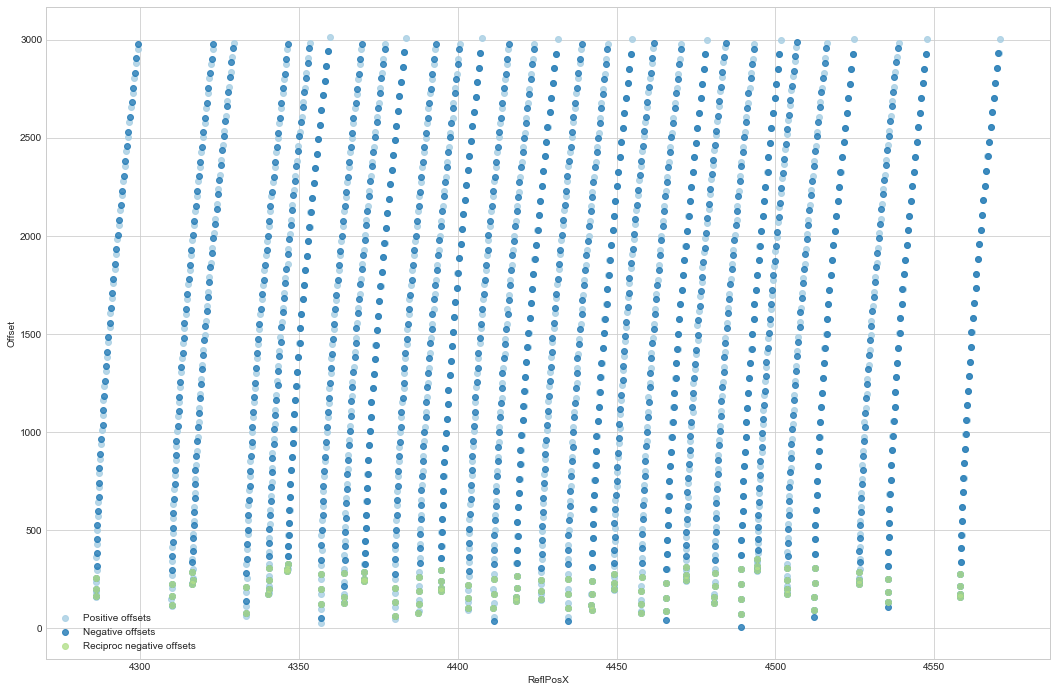

In [43]:
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt.figure(figsize=(18,12))
sns.regplot(x=df1_mpy_3500['ReflPosX'], y=df1_mpy_3500["Offset"], fit_reg=False, label='Positive offsets')
sns.regplot(x=df2_mpy_3500['ReflPosX'], y=df2_mpy_3500["Offset"], fit_reg=False, label='Negative offsets')
sns.regplot(x=df2_mpy_3500[df2_mpy_3500['Reciproc']]['ReflPosX'], y=df2_mpy_3500[df2_mpy_3500['Reciproc']]["Offset"], fit_reg=False, label='Reciproc negative offsets');
plt.legend();

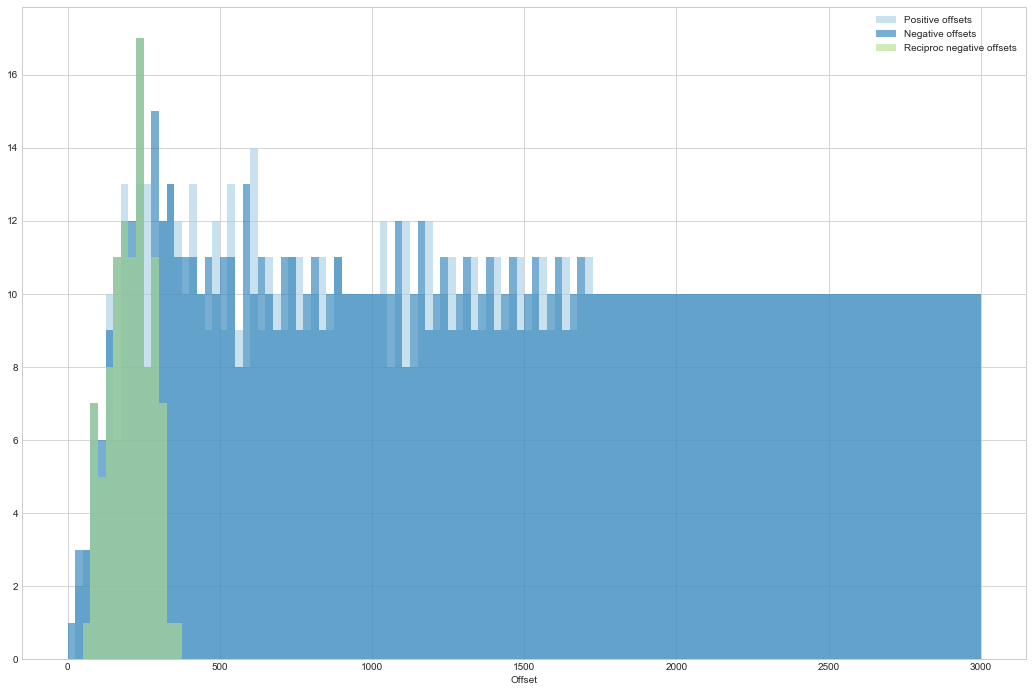

In [44]:
plt.figure(figsize=(18,12))
plt.hist(df1_mpy_3500['Offset'], range=(0, 3000), bins=120, alpha=0.6, label='Positive offsets')
plt.hist(df2_mpy_3500['Offset'], range=(0, 3000), bins=120, alpha=0.6, label='Negative offsets')
plt.hist(df2_mpy_3500[df2_mpy_3500['Reciproc']]['Offset'], range=(0, 3000), bins=120, alpha=0.6, label='Reciproc negative offsets')
plt.xlabel('Offset')
plt.legend();

## Experimental code below (Ignore)

In [ ]:
stop

In [ ]:
offset_min = 0
offset_max = int(np.ceil(max(df1_raw.Offset.max(), df2_raw.Offset.max())))
offset_inc = 10

In [ ]:
midptx_min = int(np.floor(min(df1_raw.MidPtX.min(), df2_raw.MidPtX.min())))
midptx_max = int(np.ceil(max(df1_raw.MidPtX.max(), df2_raw.MidPtX.max())))
midpty_min = int(np.floor(min(df1_raw.MidPtY.min(), df2_raw.MidPtY.min())))
midpty_max = int(np.ceil(max(df1_raw.MidPtY.max(), df2_raw.MidPtY.max())))
midpt_inc = 10

In [ ]:
int(offset_max)

In [ ]:
offset_breaks = range(offset_min, offset_max + offset_inc, offset_inc)
offset_planes = pd.IntervalIndex.from_breaks(offset_breaks)

In [ ]:
midptx_breaks = range(midptx_min, midptx_max + midpt_inc, midpt_inc)
midptx_planes = pd.IntervalIndex.from_breaks(midptx_breaks)
midpty_breaks = range(midpty_min, midpty_max + midpt_inc, midpt_inc)
midpty_planes = pd.IntervalIndex.from_breaks(midpty_breaks)

In [ ]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()

df1 = df1_raw
df2 = df2_raw

In [ ]:
df1['Offset plane'] = pd.cut(df1_raw['Offset'], offset_planes)
df2['Offset plane'] = pd.cut(df2_raw['Offset'], offset_planes)
df1['MidPtX plane'] = pd.cut(df1_raw['MidPtX'], midptx_planes)
df2['MidPtX plane'] = pd.cut(df2_raw['MidPtX'], midptx_planes)
df1['MidPtY plane'] = pd.cut(df1_raw['MidPtY'], midpty_planes)
df2['MidPtY plane'] = pd.cut(df2_raw['MidPtY'], midpty_planes)

In [ ]:
df1

In [ ]:
df2_raw.AzSrc.max()

In [ ]:
df2_raw.AzRec.min()

In [ ]:
len(df1)+len(df2)

In [ ]:
#df_all = df1.merge(df2.drop_duplicates(), on=['Offset plane','MidPtX plane', 'MidPtY plane'], how='left', indicator=True)

In [ ]:
#len(df_all)

In [ ]:
#test = df1[~df1[['Offset planes', 'MidPtX planes', 'MidPtY planes']].isin(df2[['Offset planes', 'MidPtX planes', 'MidPtY planes']])].dropna()

In [ ]:
df1['ve'] = '+'
df2['ve'] = '-'

In [ ]:
df1['Duplicated in self'] = df1.duplicated(subset=['Offset plane','MidPtX plane', 'MidPtY plane'])
df2['Duplicated in self'] = df2.duplicated(subset=['Offset plane','MidPtX plane', 'MidPtY plane'])

In [ ]:
df_concat = pd.concat([df1, df2]).reset_index()

In [ ]:
df_concat['Duplicated'] = df_concat.duplicated(subset=['Offset plane','MidPtX plane', 'MidPtY plane'])

In [ ]:
df_concat

In [ ]:
df_concat.Duplicated.value_counts()

In [ ]:
df1['Duplicated in self'].value_counts()

In [ ]:
df2['Duplicated in self'].value_counts()

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df_concat['Offset'], bins=40, alpha=0.6, label='all')
plt.hist(df_concat[df_concat['Duplicated']]['Offset'], bins=40, alpha=0.6, label='duplicates');

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df1['Offset'], bins=40, alpha=0.6, label='all')
plt.hist(df1[df1['Duplicated in self']]['Offset'], bins=40, alpha=0.6, label='non duplicates');

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df2['Offset'], bins=40, alpha=0.6, label='all')
plt.hist(df2[df2['Duplicated in self']]['Offset'], bins=40, alpha=0.6, label='non duplicates');

In [ ]:
df1_dd = df1.drop_duplicates(subset=['Offset plane','MidPtX plane', 'MidPtY plane'])

In [ ]:
len(df1)

In [ ]:
len(df1_dd)

In [ ]:
df2_dd = df2.drop_duplicates(subset=['Offset plane','MidPtX plane', 'MidPtY plane'])

In [ ]:
len(df2)

In [ ]:
len(df2_dd)

In [ ]:
df_concat_dd = pd.concat([df1_dd, df2_dd]).reset_index()

In [ ]:
df_concat_dd['Duplicated'] = df_concat_dd.duplicated(subset=['Offset plane','MidPtX plane', 'MidPtY plane'])

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df_concat_dd['Offset'], bins=120, alpha=0.6, label='all')
plt.hist(df_concat_dd[df_concat_dd['Duplicated']]['Offset'], bins=120, alpha=0.6, label='duplicates')
plt.legend()
plt.title('Offset histogram');

In [ ]:
df_concat_dd[df_concat_dd['Duplicated']].plot(x='AzSrc', y='AzRec', kind='scatter', figsize=(12,8));

In [ ]:
df_concat_dd.plot(x='AzSrc', y='AzRec', kind='scatter', figsize=(12,8));

In [ ]:
df_concat.plot(x='AzSrc', y='AzRec', kind='scatter', figsize=(12,8));

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt.figure(figsize=(12,8))
sns.regplot(x=df_concat_dd[df_concat_dd['ve']=='+']["AzSrc"], y=df_concat_dd[df_concat_dd['ve']=='+']["AzRec"], fit_reg=False)
sns.regplot(x=df_concat_dd[df_concat_dd['ve']=='-']["AzSrc"], y=df_concat_dd[df_concat_dd['ve']=='-']["AzRec"], fit_reg=False);
#sns.regplot(x=df_concat_dd[df_concat_dd['Duplicated']]["AzSrc"], y=df_concat_dd[df_concat_dd['Duplicated']]["AzRec"], fit_reg=False)

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt.figure(figsize=(12,8))
sns.regplot(x=df_concat_dd[df_concat_dd['ve']=='+']["AzSrc"], y=df_concat_dd[df_concat_dd['ve']=='+']["AzRec"], fit_reg=False)
sns.regplot(x=df_concat_dd[df_concat_dd['ve']=='-']["AzSrc"], y=df_concat_dd[df_concat_dd['ve']=='-']["AzRec"], fit_reg=False)
sns.regplot(x=df_concat_dd[df_concat_dd['Duplicated']]["AzSrc"], y=df_concat_dd[df_concat_dd['Duplicated']]["AzRec"], fit_reg=False);

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt.figure(figsize=(18,12))
sns.regplot(x=df_concat_dd[df_concat_dd['ve']=='+']["ReflPosX"], y=df_concat_dd[df_concat_dd['ve']=='+']["ReflPosY"], fit_reg=False)
#sns.regplot(x=df_concat_dd[df_concat_dd['ve']=='-']["ReflPosX"], y=df_concat_dd[df_concat_dd['ve']=='-']["ReflPosY"], fit_reg=False)
#sns.regplot(x=df_concat_dd[df_concat_dd['Duplicated']]["ReflPosX"], y=df_concat_dd[df_concat_dd['Duplicated']]["ReflPosY"], fit_reg=False)
plt.ylim(0, 7000);

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt.figure(figsize=(18,12))
sns.regplot(x=df_concat_dd[df_concat_dd['ve']=='+']["ReflPosX"], y=df_concat_dd[df_concat_dd['ve']=='+']["ReflPosY"], fit_reg=False)
sns.regplot(x=df_concat_dd[df_concat_dd['ve']=='-']["ReflPosX"], y=df_concat_dd[df_concat_dd['ve']=='-']["ReflPosY"], fit_reg=False)
#sns.regplot(x=df_concat_dd[df_concat_dd['Duplicated']]["ReflPosX"], y=df_concat_dd[df_concat_dd['Duplicated']]["ReflPosY"], fit_reg=False)
plt.ylim(0, 7000);

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt.figure(figsize=(18,12))
sns.regplot(x=df_concat_dd[df_concat_dd['ve']=='+']["ReflPosX"], y=df_concat_dd[df_concat_dd['ve']=='+']["ReflPosY"], fit_reg=False)
sns.regplot(x=df_concat_dd[df_concat_dd['ve']=='-']["ReflPosX"], y=df_concat_dd[df_concat_dd['ve']=='-']["ReflPosY"], fit_reg=False)
sns.regplot(x=df_concat_dd[df_concat_dd['Duplicated']]["ReflPosX"], y=df_concat_dd[df_concat_dd['Duplicated']]["ReflPosY"], fit_reg=False)
plt.ylim(3000, 4000);

In [ ]:
df1_raw

In [ ]:
df1_raw[df1_raw['MidPtY']==3500].count()

In [ ]:
df1_mpy_3500 = df1_raw[df1_raw['MidPtY']==3500]

In [ ]:
df1_mpy_3500